In [1]:
using BenchmarkTools
using Plots
using DRR

┌ Info: Precompiling DRR [b7cdf4c7-cd72-4265-95a4-eec1a441a985]
└ @ Base loading.jl:1423


volume, ΔX, ΔY, ΔZ = read_dicom("../data/cxr"; pad=true)
heatmap(volume[:, :, end-1])We will need to benchmark four experiments: 

|     | Serial     | Parallel     |
|-----|------------|--------------|
| CPU | CPU Serial | CPU Parallel |
| GPU | GPU Serial | GPU Parallel |

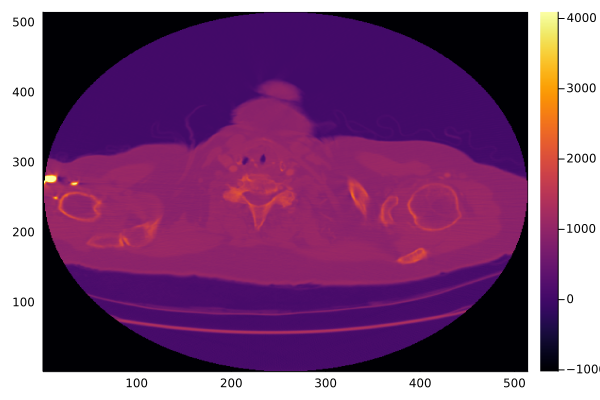

In [2]:
volume, ΔX, ΔY, ΔZ = read_dicom("../data/cxr"; pad=true)
heatmap(volume[:, :, end-1])

In [4]:
# Read the volume
volume, ΔX, ΔY, ΔZ = read_dicom("../data/cxr"; pad=true)
# volume = volume[:, :, 2:end-1]
grid, pixels = volume2grid(volume, ΔX, ΔY, ΔZ)

(GridInterpolations.RectangleGrid{3}([0.0, 0.703125, 1.40625, 2.109375, 2.8125, 3.515625, 4.21875, 4.921875, 5.625, 6.328125  …  354.375, 355.078125, 355.78125, 356.484375, 357.1875, 357.890625, 358.59375, 359.296875, 360.0, 360.703125],[0.0, 0.703125, 1.40625, 2.109375, 2.8125, 3.515625, 4.21875, 4.921875, 5.625, 6.328125  …  354.375, 355.078125, 355.78125, 356.484375, 357.1875, 357.890625, 358.59375, 359.296875, 360.0, 360.703125],[0.0, 2.5, 5.0, 7.5, 10.0, 12.5, 15.0, 17.5, 20.0, 22.5  …  312.5, 315.0, 317.5, 320.0, 322.5, 325.0, 327.5, 330.0, 332.5, 335.0],), Int16[-1024, -1024, -1024, -1024, -1024, -1024, -1024, -1024, -1024, -1024  …  -1024, -1024, -1024, -1024, -1024, -1024, -1024, -1024, -1024, -1024])

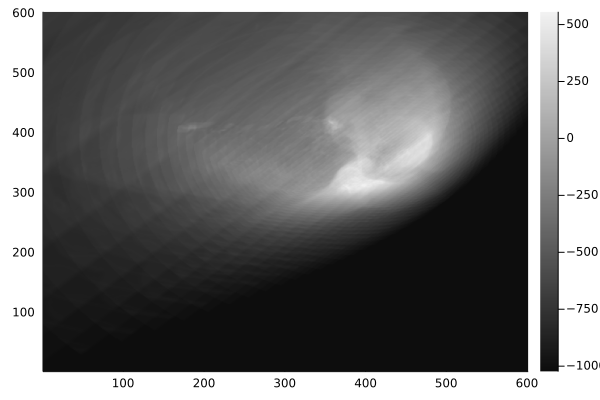

In [10]:
# Define the camera
center = Vec3(180., 180., -100)
camera = Camera(center)

# Define the detector plane
center = Vec3(180., 180., 500.)
normal = Vec3(1., -1., -1.)
height, width = 601, 601
Δx, Δy = 2., 2.
detector = Detector(center, normal, height, width, Δx, Δy)

# Generate the DRR
spacing = 0.02
drr = make_drr(grid, pixels, camera, detector, spacing)
heatmap(drr, c=:grays)

In [33]:
rang = vcat(0.005, 0.01:0.01:0.09, 0.1:0.1:0.5, 0.75)

16-element Vector{Float64}:
 0.005
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.07
 0.08
 0.09
 0.1
 0.2
 0.3
 0.4
 0.5
 0.75

In [34]:
smp = length(rang)

benchtimes = Array{Float64}(undef, smp)

for i = 1:smp
    # Generate the DRR
    spacing = rang[i]
    benchtimes[i] = @elapsed make_drr(grid, pixels, camera, detector, spacing)
end

In [35]:
benchtimes

16-element Vector{Float64}:
 27.4683624
 14.0445356
  7.4280931
  5.125542
  3.9690554
  3.4203947
  2.719457
  2.3534992
  2.3037334
  1.8145279
  1.6868817
  0.9806269
  0.6947561
  0.5577976
  0.5389174
  0.4064301

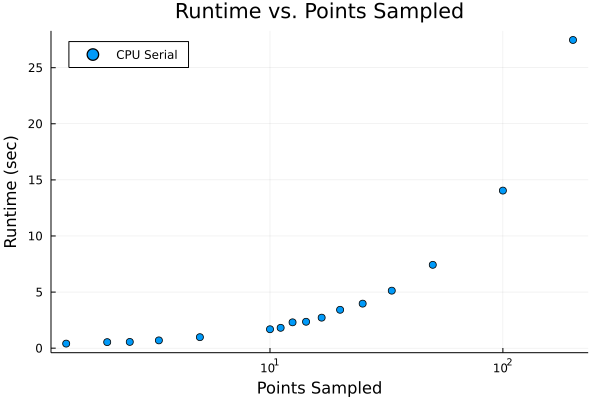

In [49]:
scatter(1 ./ rang, benchtimes, legend=:topleft, xaxis=:log, 
    xlabel="Points Sampled", ylabel="Runtime (sec)", 
    title="Runtime vs. Points Sampled", label="CPU Serial")

In [50]:
using Distributed

In [51]:
# add workers
if nworkers()==1
  addprocs(5)  
  println(workers())
end

1

In [54]:
using SharedArrays

In [59]:
a = SharedArray{Float64}(10000000)

10000000-element SharedVector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0